In [12]:
import numpy as np
import torch
from tqdm import tqdm

In [62]:
def rosenbrock_function(x):
    if len(x) < 2:
        raise ValueError("Rosenbrock function requires at least two dimensions.")
    sum_term = np.sum(100 * (x[1:] - x[:-1] ** 2) ** 2 + (1 - x[:-1]) ** 2)
    return sum_term

def torch_rosenbrock_function(x):
    if len(x) < 2:
        raise ValueError("Rosenbrock function requires at least two dimensions.")
    sum_term = torch.sum(100 * (x[1:] - x[:-1] ** 2) ** 2 + (1 - x[:-1]) ** 2)
    return sum_term

def levy_function(x):
    w = 1 + (x - 1) / 4
    term1 = np.sin(np.pi * w[0]) ** 2
    term2 = np.sum((w[:-1] - 1) ** 2 * (1 + 10 * np.sin(np.pi * w[:-1] + 1) ** 2))
    term3 = (w[-1] - 1) ** 2 * (1 + np.sin(2 * np.pi * w[-1]) ** 2)
    return term1 + term2 + term3

def torch_levy_function(x):
    w = 1 + (x - 1) / 4
    term1 = torch.sin(torch.pi * w[0]) ** 2
    term2 = torch.sum((w[:-1] - 1) ** 2 * (1 + 10 * torch.sin(torch.pi * w[:-1] + 1) ** 2))
    term3 = (w[-1] - 1) ** 2 * (1 + torch.sin(2 * np.pi * w[-1]) ** 2)
    return term1 + term2 + term3

def drop_wave_function(x):
    if len(x) != 2:
        raise ValueError("EASOM function requires two dimensions.")
    y=x[1]
    x=x[0]
    numerator = -1 - np.cos(12 * np.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return numerator / denominator

def torch_drop_wave_function(x):
    if len(x) != 2:
        raise ValueError("EASOM function requires two dimensions.")
    y=x[1]
    x=x[0]
    numerator = -1 - torch.cos(12 * torch.sqrt(x**2 + y**2))
    denominator = 0.5 * (x**2 + y**2) + 2
    return numerator / denominator

def rastrigin_function(x):
    n = len(x)
    A = 10.0
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def torch_rastrigin_function(x):
    n = len(x)
    A = 10.0
    return A * n + torch.sum(x**2 - A * torch.cos(2 * torch.pi * x))

def dixon_price_function(x):
    n = len(x)    
    return (x[0] - 1)**2 + np.sum(np.arange(2, n + 1) * (2 * x[1:]**2 - x[:-1])**2)


def torch_dixon_price_function(x):
    n = len(x)    
    return (x[0] - 1)**2 + torch.sum(torch.arange(2, n + 1) * (2 * x[1:]**2 - x[:-1])**2)

def easom_function(x):
    if len(x) != 2:
        raise ValueError("EASOM function requires two dimensions.")
    y=x[1]
    x=x[0]
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

def torch_easom_function(x):
    if len(x) != 2:
        raise ValueError("EASOM function requires two dimensions.")
    y=x[1]
    x=x[0]
    return -torch.cos(x) * torch.cos(y) * torch.exp(-((x - torch.pi)**2 + (y - torch.pi)**2))

def michalewicz_function(x, m=10):
    return -np.sum(np.sin(x) * np.sin((np.arange(1, len(x) + 1) * x**2) / np.pi)**(2 * m))

def torch_michalewicz_function(x, m=10):
    return -torch.sum(torch.sin(x) * torch.sin((torch.arange(1, len(x) + 1) * x**2) / torch.pi)**(2 * m))

def sphere_function(x):
    return np.sum(x**2)

def torch_sphere_function(x):
    return torch.sum(x**2)


In [63]:
functions_info = {
    'Easom': {
        'function': [easom_function,torch_easom_function],
        'dimension': 2,
        'evaluation_interval': [-100,100],
        'global_minimum': (np.pi, np.pi),
        'global_minimum_value': -1
    },
    'Michalewicz': {
        'function': [michalewicz_function,torch_michalewicz_function],
        'dimension': 2,
        'evaluation_interval': [0, np.pi],
        'global_minimum': (2.20, 1.57),  # Adjusted based on literature
        'global_minimum_value': michalewicz_function(np.array([2.20, 1.57]))
    },
    'Dixon-Price': {
        'function': [dixon_price_function,torch_dixon_price_function],
        'dimension': None,
        'evaluation_interval': [-10,10],
        'global_minimum': (lambda d: np.array([2**(-(2**i-2)/2**i) for i in range(1,d+1)])),
        'global_minimum_value': 0
    },
    'Rosenbrock': {
        'function': [rosenbrock_function,torch_rosenbrock_function],
        'dimension': None,
        'evaluation_interval': [-5,10],
        'global_minimum': (lambda d: np.array([1 for _ in range(d)])),
        'global_minimum_value': 0
    },
    'Rasting': {
        'function': [rastrigin_function,torch_rastrigin_function],
        'dimension': None,
        'evaluation_interval': [-5.12,5.12],
        'global_minimum': (lambda d: np.array([0 for _ in range(d)])),
        'global_minimum_value': 0
    },
    'Drop-Wave': {
        'function': [drop_wave_function,torch_drop_wave_function],
        'dimension': 2,
        'evaluation_interval': [-5.12,5.12],
        'global_minimum': np.array([0,0]),
        'global_minimum_value': -1
    },
    'Levy': {
        'function': [levy_function,torch_levy_function],
        'dimension': None,
        'evaluation_interval': [-10,10],
        'global_minimum': (lambda d: np.array([1 for _ in range(d)])),
        'global_minimum_value': 0
    },
    'Sphere': {
        'function': [sphere_function,torch_sphere_function],
        'dimension': None,
        'evaluation_interval': [-5.12,5.12],
        'global_minimum': (lambda d: np.array([0 for _ in range(d)])),
        'global_minimum_value': 0
    }
}


In [79]:
###GRADIENT DESCENT

def adaptive_derivative(func, x, h_init=1e-5, tol=1e-6, max_iter=100):
    """
    Compute the adaptive numerical derivative of a function at a given point.

    Parameters:
    - func: The function to differentiate.
    - x: The point at which to compute the derivative.
    - h_init: Initial step size.
    - tol: Tolerance for convergence.
    - max_iter: Maximum number of iterations.

    Returns:
    - The numerical derivative.
    """

    h = h_init
    for _ in range(max_iter):
        # Central difference formula for numerical derivative in each dimension
        derivatives = []
        for i in range(x.shape[0]):
            h_i = np.zeros_like(x)
            h_i[i] = h
            derivative_i = (func(x + h_i) - func(x - h_i)) / (2 * h)
            derivatives.append(derivative_i)

        derivative = np.stack(derivatives, axis=-1)

        # Estimate error using Richardson extrapolation
        h /= 2
        derivatives_prime = []
        for i in range(x.shape[0]):
            h_i = np.zeros_like(x)
            h_i[i] = h
            derivative_prime_i = (func(x + h_i) - func(x - h_i)) / (2 * h)
            derivatives_prime.append(derivative_prime_i)

        derivative_prime = np.stack(derivatives_prime, axis=-1)
        error = np.linalg.norm(derivative - derivative_prime)

        # Check for convergence
        if error < tol:
            return derivative

    raise RuntimeError("Adaptive derivative did not converge within the maximum number of iterations.")

def backtracking_line_search(objective_function, x, direction, initial_learning_rate=1.0, alpha=0.5, beta=0.9):
    """
    Perform backtracking line search to find an appropriate learning rate.

    Parameters:
    - objective_function: The objective function.
    - x: Current point in the optimization.
    - direction: The search direction.
    - initial_learning_rate: Initial guess for the learning rate.
    - alpha: Armijo condition parameter.
    - beta: Reduction factor for the learning rate.

    Returns:
    - The determined learning rate for the current iteration.
    """
    learning_rate = initial_learning_rate

    while np.min(objective_function(x - learning_rate * direction) - (objective_function(x) - alpha * learning_rate * np.dot(adaptive_derivative(objective_function, x), direction)))>0:
        learning_rate *= beta

    return learning_rate

def gradient_descent(objective_function, initial_point, num_iterations=2500, beta=0.3):
    """
    Perform Gradient Descent with Momentum and Backtracking Line Search.

    Parameters:
    - objective_function: The objective function to minimize.
    - initial_point: The starting point for optimization.
    - num_iterations: Number of iterations for the optimization.
    - beta: Momentum factor, controls the influence of the previous gradients.

    Returns:
    - The optimized solution that minimizes the given objective function.
    """
    x = initial_point.copy()
    momentum = np.zeros_like(x)
    epsilon = 1e-5

    for iteration in tqdm(range(num_iterations)):
        gradient = adaptive_derivative(objective_function, x, epsilon)

        if np.linalg.norm(gradient) < 1e-6:
            print("Optimum find in iteration:", iteration)
            break

        # Update with momentum
        momentum = beta * momentum + (1 - beta) * gradient

        # Backtracking line search for learning rate
        learning_rate = backtracking_line_search(objective_function, x, momentum)

        x -= learning_rate * momentum

    return x



In [78]:
### Pytorch GD
import torch

def torch_backtracking_line_search(objective_function, x, direction, initial_learning_rate=1.0, alpha=0.5, beta=0.9):
    """
    Perform backtracking line search to find an appropriate learning rate.

    Parameters:
    - objective_function: The objective function.
    - x: Current point in the optimization.
    - direction: The search direction.
    - initial_learning_rate: Initial guess for the learning rate.
    - alpha: Armijo condition parameter.
    - beta: Reduction factor for the learning rate.

    Returns:
    - The determined learning rate for the current iteration.
    """
    learning_rate = initial_learning_rate

    while torch.min(objective_function(x - learning_rate * direction) - (objective_function(x) - alpha * learning_rate * torch.dot( torch.autograd.grad(objective_function(x), x)[0], direction)))>0:
        learning_rate *= beta

    return learning_rate

def gradient_descent_pytorch(objective_function, initial_point, num_iterations=2500, beta=0.3):
    """
    Gradient Descent optimization using PyTorch.

    Parameters:
    - objective_function: The PyTorch objective function.
    - initial_point: The initial guess for the optimization.
    - learning_rate: The learning rate for gradient descent.
    - num_iterations: Number of iterations.
    - tol: Tolerance for convergence.

    Returns:
    - The optimized solution.
    """

    x = torch.tensor(initial_point, requires_grad=True, dtype=torch.float64)
    momentum = torch.zeros_like(x)
    
    for iteration in tqdm(range(num_iterations)):
        # Compute the gradient
        gradient = torch.autograd.grad(objective_function(x), x)[0]

        if torch.norm(gradient) < 1e-5:
            print("Optimum find in iteration:", iteration)
            break

        # Update the parameters
        momentum = beta * momentum + (1 - beta) * gradient
        
        # Backtracking line search for learning rate
        learning_rate = torch_backtracking_line_search(objective_function, x, momentum)

        x.data -= learning_rate * momentum

    return x.data.numpy()


In [94]:
#Newton's method

def newtons_method(objective_function, initial_guess, tolerance=1e-6, max_iterations=200):
    """
    Newton's method for function minimization using PyTorch.

    Parameters:
    - objective_function: The objective function to minimize.
    - initial_guess: The initial guess for the root.
    - tolerance: Tolerance for convergence.
    - max_iterations: Maximum number of iterations.

    Returns:
    - The optimized solution that minimizes the given objective function.
    """

    x = torch.tensor(initial_guess, requires_grad=True, dtype=torch.float64)

    for iteration in tqdm(range(max_iterations)):
        # Compute the gradient and Hessian
        gradient = torch.autograd.grad(objective_function(x), x)[0]
        # Check for convergence
        if torch.norm(gradient) < tolerance:
            break
        hessian = torch.autograd.functional.hessian(objective_function, x)

        # Solve the linear system Hessian * delta_x = -gradient for the update
        delta_x = torch.linalg.solve(hessian, -gradient)

        # Update the guess
        x = x + delta_x



    return x.detach().numpy()

In [70]:
### GENETIC ALGORITHM
def initialize_population(population_size, dimension, min, max):
    """
    Initialize a random population for the GA.

    Parameters:
    - population_size: Number of individuals in the population.
    - dimension: Number of dimensions in the search space.

    Returns:
    - A 2D NumPy array representing the initial population.
    """
    return np.random.rand(population_size, dimension) * (max- min) + min

def crossover(parent1, parent2):
    """
    Perform crossover (recombination) between two parents.

    Parameters:
    - parent1: First parent.
    - parent2: Second parent.

    Returns:
    - A child produced by crossover.
    """
    if not len(parent1) == 2:
        crossover_point = np.random.randint(1, len(parent1) - 1)
    else:
        crossover_point = 1
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child

def mutate(individual, mutation_rate=0.2):
    """
    Perform mutation on an individual.

    Parameters:
    - individual: The individual to mutate.
    - mutation_rate: Probability of mutation for each gene.

    Returns:
    - The mutated individual.
    """
    mutation_mask = np.random.rand(len(individual)) < mutation_rate
    individual[mutation_mask] += np.random.normal(0, 0.2, mutation_mask.sum())
    return individual

def select_parents(population, fitness):
    """
    Select two parents based on tournament selection.

    Parameters:
    - population: The current population.
    - fitness: The fitness values of individuals in the population.

    Returns:
    - Two parents selected for reproduction.
    """
    tournament_size = 3
    tournament_indices = np.random.choice(len(population), tournament_size, replace=False)
    tournament_fitness = fitness[tournament_indices]
    parent_indices = tournament_indices[np.argmin(tournament_fitness)]
    return population[parent_indices]

def genetic_algorithm(objective_function, dimension, min, max, population_size=400, generations=800, crossover_prob=0.8, mutation_prob=0.2):
    """
    Perform a genetic algorithm for multidimensional function minimization.

    Parameters:
    - objective_function: The function to be minimized.
    - dimension: Number of dimensions in the search space.
    - population_size: Number of individuals in the population.
    - generations: Number of generations.
    - crossover_prob: Probability of crossover.
    - mutation_prob: Probability of mutation.

    Returns:
    - The best solution found.
    """
    population = initialize_population(population_size, dimension, min, max)
    best_solution = None
    best_fitness = float('inf')

    for generation in tqdm(range(generations)):
        # Evaluate fitness of each individual
        fitness = np.apply_along_axis(objective_function, 1, population)

        # Find the best individual in the current generation
        current_best_index = np.argmin(fitness)
        current_best_fitness = fitness[current_best_index]

        # Update best solution if needed
        if current_best_fitness < best_fitness:
            best_solution = population[current_best_index]
            best_fitness = current_best_fitness

        # Create the next generation
        new_population = []

        for _ in range(population_size // 2):
            # Select parents
            parent1 = select_parents(population, fitness)
            parent2 = select_parents(population, fitness)

            # Perform crossover
            if np.random.rand() < crossover_prob:
                child1 = crossover(parent1, parent2)
                child2 = crossover(parent2, parent1)
            else:
                child1, child2 = parent1, parent2

            # Perform mutation
            child1 = mutate(child1, mutation_prob)
            child2 = mutate(child2, mutation_prob)

            new_population.extend([child1, child2])

        population = np.array(new_population)

    return best_solution, best_fitness

In [71]:
### PSO
class Particle:
    def __init__(self, dimension, min_bound, max_bound):
        """
        Initialize a particle for Particle Swarm Optimization (PSO).

        Parameters:
        - dimension: Number of dimensions in the search space.
        - min_bound: Minimum bound for each dimension.
        - max_bound: Maximum bound for each dimension.
        """
        self.position = np.random.uniform(min_bound, max_bound, dimension)
        self.velocity = np.random.rand(dimension)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

def update_velocity(particle, global_best_position, inertia=0.5, cognitive_weight=1.5, social_weight=1.5):
    """
    Update the velocity of a particle in PSO.

    Parameters:
    - particle: The particle to update.
    - global_best_position: The global best position in the swarm.
    - inertia: Inertia weight, controls the influence of the previous velocity.
    - cognitive_weight: Weight for the particle's best position.
    - social_weight: Weight for the global best position.

    Returns:
    - The updated velocity of the particle.
    """
    r1, r2 = np.random.rand(particle.position.shape[0]), np.random.rand(particle.position.shape[0])

    cognitive_component = cognitive_weight * r1 * (particle.best_position - particle.position)
    social_component = social_weight * r2 * (global_best_position - particle.position)

    new_velocity = inertia * particle.velocity + cognitive_component + social_component
    return new_velocity

def particle_swarm_optimization(objective_function, dimension, min_bound, max_bound, population_size=400, num_iterations=800):
    """
    Perform Particle Swarm Optimization (PSO) for multidimensional function minimization.

    Parameters:
    - objective_function: The function to be minimized.
    - dimension: Number of dimensions in the search space.
    - min_bound: Minimum bound for each dimension.
    - max_bound: Maximum bound for each dimension.
    - population_size: Number of particles in the swarm.
    - num_iterations: Number of iterations.

    Returns:
    - The global best position and its fitness value.
    """
    particles = [Particle(dimension, min_bound, max_bound) for _ in range(population_size)]

    global_best_position = None
    global_best_fitness = float('inf')

    for _ in tqdm(range(num_iterations)):
        for particle in particles:
            fitness = objective_function(particle.position)

            if fitness < particle.best_fitness:
                particle.best_position = particle.position.copy()
                particle.best_fitness = fitness

            if fitness < global_best_fitness:
                global_best_position = particle.position.copy()
                global_best_fitness = fitness

        for particle in particles:
            particle.velocity = update_velocity(particle, global_best_position)
            particle.position += particle.velocity
            particle.position = np.clip(particle.position, min_bound, max_bound)

    return global_best_position, global_best_fitness

In [92]:
# Simulated Annealing algorithm
import warnings
warnings.filterwarnings("ignore", message="overflow encountered in exp")

def simulated_annealing(objective_function, dimension, min_bound, max_bound, n_iterations = 120000, step_size = 0.1, temp = 20):
    """
    Perform Simulated Annealing for multidimensional function minimization.

    Parameters:
    - objective_function: The objective function to minimize.
    - dimension: Number of dimensions in the search space.
    - min_bound: Minimum bound for each dimension.
    - max_bound: Maximum bound for each dimension.
    - n_iterations: Number of iterations.
    - step_size: The step size for generating candidate points.
    - temp: Initial temperature for the annealing schedule.

    Returns:
    - The best solution and its fitness value.
    """
    best = np.random.rand(dimension) * (max_bound- min_bound) + min_bound
    best_eval = objective_function(best)
    curr, curr_eval = best, best_eval

    # Run the algorithm
    for i in tqdm(range(1, n_iterations + 1)):
        candidate = curr + np.random.randn(dimension) * step_size
        candidate = np.clip(candidate, min_bound, max_bound)
        candidate_eval = objective_function(candidate)
        
        # Check for a new best solution
        if candidate_eval < best_eval:
            best, best_eval = candidate, candidate_eval
        
        diff = candidate_eval - curr_eval
        t = temp / float(i+1)

        # Calculate Metropolis acceptance criterion
        metropolis = np.exp(-diff / t)
        if diff < 0 or np.random.rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval

    return [best, best_eval]


In [ ]:
ndim = 10
for key, val in functions_info.items():
    np_func = val['function'][0]
    torch_func = val['function'][1]
    dim = val['dimension']
    if dim == None:
        dim = ndim
        pos_min = val['global_minimum'](dim)
    else:
        pos_min = val['global_minimum']
    lb = val['evaluation_interval'][0]
    ub = val['evaluation_interval'][1]
    glob_min = val['global_minimum_value']
    
    print(f'Running benchmark in {key}, minima: {glob_min}, \npos: {pos_min}')

    for i in range(10):    
        np.random.seed(i)
        x_0 = np.random.rand(dim) * (ub-lb) + lb
        x = gradient_descent(np_func, x_0)
        #print(f"GD: min {np_func(x)}, pos: {x}")

        if 'GD' not in val.keys():
            val['GD'] = []
        val['GD'].append([np_func(x), x])    

        np.random.seed(i)
        x_0 = np.random.rand(dim) * (ub-lb) + lb
        x = gradient_descent_pytorch(torch_func, x_0)
        #print(f"GD_t: min {np_func(x)}, pos: {x}")

        if 'GD_T' not in val.keys():
            val['GD_T'] = []
        val['GD_T'].append([np_func(x), x])  

        np.random.seed(i)
        x_0 = np.random.rand(dim) * (ub-lb) + lb
        x = newtons_method(torch_func, x_0)
        #print(f"Newton: min {np_func(x)}, pos: {x}")

        if 'Newton' not in val.keys():
            val['Newton'] = []
        val['Newton'].append([np_func(x), x])  
        

        np.random.seed(i)
        x = genetic_algorithm(np_func, dim, lb, ub)
        #print(f"GA: min {x[1]}, pos: {x[0]}")

        if 'GA' not in val.keys():
            val['GA'] = []
        val['GA'].append([x[1], x[0]])    
        

        np.random.seed(i)
        x = particle_swarm_optimization(np_func, dim, lb, ub)
        #print(f"PSO: min {x[1]}, pos: {x[0]}")
        print()
    
        if 'PSO' not in val.keys():
            val['PSO'] = []
        val['PSO'].append([x[1], x[0]])  

        np.random.seed(i)
        x = simulated_annealing(np_func, dim, lb, ub)
        print(f"SA: min {x[1]}, pos: {x[0]}")
        print()
    
        if 'SA' not in val.keys():
            val['SA'] = []
        val['SA'].append([x[1], x[0]])    
        


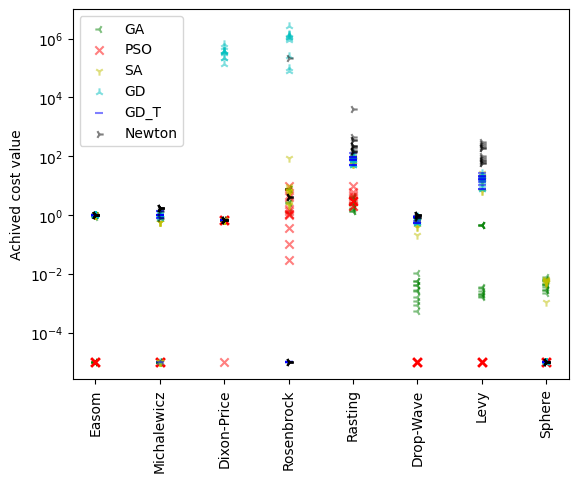

In [183]:
import matplotlib.pyplot as plt
REPEAT = 10
lis = [['GA', 'g', '3'], ['PSO', 'r', 'x'], ['SA', 'y', '1'], ['GD', 'c', '2'], ['GD_T', 'b', '_'], ['Newton', 'k', '4']]
i = 0
xl=[]
for key, ver in functions_info.items():
    #print(key)
    for alg, col, m in lis:
        #print([e[0] for e in ver[alg]])
        if key == 'Easom':
            plt.scatter([key for _ in range(len(ver[alg]))], [max(e[0]-ver['global_minimum_value'],1e-5) for e in ver[alg]], c=col, marker = m, alpha=0.5, label = alg)
        else:
            plt.scatter([key for _ in range(len(ver[alg]))], [max(e[0]-ver['global_minimum_value'],1e-5) for e in ver[alg]], c=col, marker = m, alpha=0.5)
    #xl.append(key)
    i += 1
plt.legend()
plt.xticks(rotation = 90)
plt.ylabel("Achived cost value")
plt.yscale('log')
plt.show()

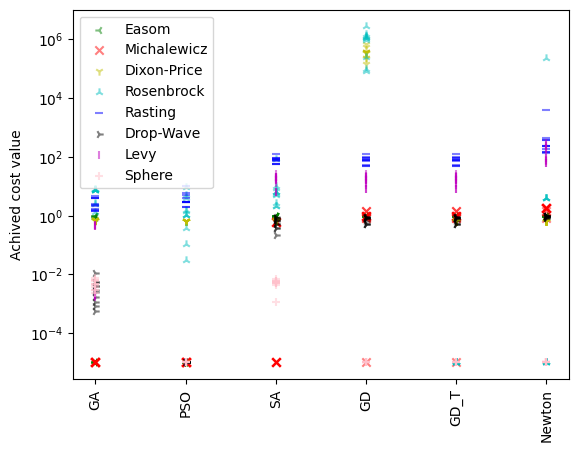

In [184]:
import matplotlib.pyplot as plt
REPEAT = 1
lis = [['GA', 'g', '3'], ['PSO', 'r', 'x'], ['SA', 'y', '1'], ['GD', 'c', '2'], ['GD_T', 'b', '_'], ['Newton', 'k', '4']]
dic2 = {'Easom': ['g', '3'], 'Michalewicz': ['r', 'x'], 'Dixon-Price': ['y', '1'], 'Rosenbrock': ['c', '2'], 'Rasting': ['b', '_'], 'Drop-Wave': ['k', '4'], 'Levy': ['m', '|'], 'Sphere': ['pink', '+']}
i = 0
xl=[]
for key, ver in functions_info.items():
    #print(key)
    for alg, col, m in lis:
        if alg == 'GD':
            plt.scatter([alg for _ in range(len(ver[alg]))], [max(e[0]-ver['global_minimum_value'],1e-5) for e in ver[alg]], c=dic2[key][0], marker = dic2[key][1], alpha=0.5, label = key)
        else:
            plt.scatter([alg for _ in range(len(ver[alg]))], [max(e[0]-ver['global_minimum_value'],1e-5) for e in ver[alg]], c=dic2[key][0], marker = dic2[key][1], alpha=0.5)
    #xl.append(key)
    i += 1
plt.legend()
plt.xticks(rotation = 90)
plt.ylabel("Achived cost value")
plt.yscale('log')
plt.show()

In [177]:
print(" & ", end = "")
for alg, col, m in lis:
    if alg != 'Newton':
        print(f'{alg} & ', end ="")
    else:
        print(f'{alg} & ', end ='\\\\ \n')
for key, ver in functions_info.items():
    print(f'{key} & ', end = "")
    for alg, col, m in lis:
        diffs = np.array([max(e[0]-ver['global_minimum_value'],1e-5) for e in ver[alg]])
        
        if alg != 'Newton':
            print(f'{np.max(diffs):.3f}\pm{np.std(diffs):.2f} & ', end = "")
        else:
            print(f'{np.max(diffs):.3f}\pm{np.std(diffs):.2f} & ', end = '\\\\ \n')
  

 & GA & PSO & SA & GD & GD_T & Newton & \\ 
Easom & 1.000\pm0.00 & 0.000\pm0.00 & 1.000\pm0.00 & 1.000\pm0.00 & 1.000\pm0.00 & 1.000\pm0.00 & \\ 
Michalewicz & 0.000\pm0.00 & 0.000\pm0.00 & 0.587\pm0.00 & 1.000\pm0.00 & 1.000\pm0.00 & 1.801\pm0.00 & \\ 
Dixon-Price & 0.685\pm0.00 & 0.667\pm0.00 & 0.697\pm0.00 & 370408.397\pm0.00 & 0.667\pm0.00 & 0.667\pm0.00 & \\ 
Rosenbrock & 7.668\pm0.00 & 1.077\pm0.00 & 2.149\pm0.00 & 1310473.449\pm0.00 & 0.000\pm0.00 & 0.000\pm0.00 & \\ 
Rasting & 3.929\pm0.00 & 2.985\pm0.00 & 55.988\pm0.00 & 49.748\pm0.00 & 49.748\pm0.00 & 364.255\pm0.00 & \\ 
Drop-Wave & 0.004\pm0.00 & 0.000\pm0.00 & 0.522\pm0.00 & 0.522\pm0.00 & 0.522\pm0.00 & 1.000\pm0.00 & \\ 
Levy & 0.457\pm0.00 & 0.000\pm0.00 & 6.550\pm0.00 & 7.697\pm0.00 & 7.697\pm0.00 & 59.819\pm0.00 & \\ 
Sphere & 0.003\pm0.00 & 0.000\pm0.00 & 0.005\pm0.00 & 0.000\pm0.00 & 0.000\pm0.00 & 0.000\pm0.00 & \\ 
